#INTRODUCTION TO DATA SCIENCE

#Group 14 -- Project phase 2

## New Models

|Name| Student ID|
|:---|:-----------:|
|Pham, Quoc Huy| 2299356|
|Hussain, Zakiuddin| 2338350|
|Lee, Daeul Haven| 2308018|
|Preetham| 2288949|
|Jayanth| 2288552|
|Srikavya| 2311351|

### 1. Linear Regression

We chose logistic pregression over linear regression for our dataset because despite using the same learning algorithm, Linear Regression is more suitable for continous variable regression task and Logistic Regression is more suitable for classification task.

In this project, because dataset have a binary or categorical outcome variable and we want to predict probabilities or classification, thus, logistic regression is more appropriate.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

In [ ]:
# Importing Cleaned data from Phase 1
data = pd.read_csv('Group_14_Clean_Data.csv')

In [ ]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

In [ ]:
# Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LogisticRegression()
# fit the model to the training data
lr.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Pedicting the Test data using the model trained
y_pred = lr.predict(X_test)

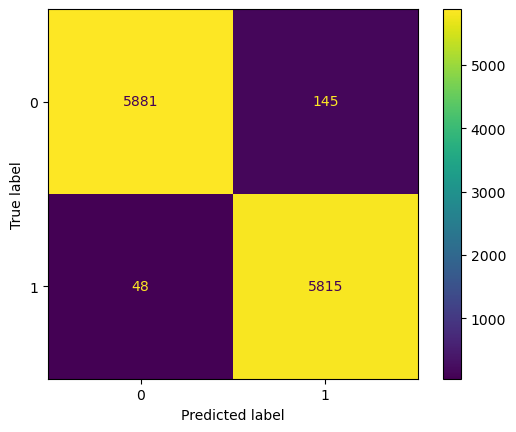

In [ ]:
# Displaying the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.9837665068550762

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6026
           1       0.98      0.99      0.98      5863

    accuracy                           0.98     11889
   macro avg       0.98      0.98      0.98     11889
weighted avg       0.98      0.98      0.98     11889



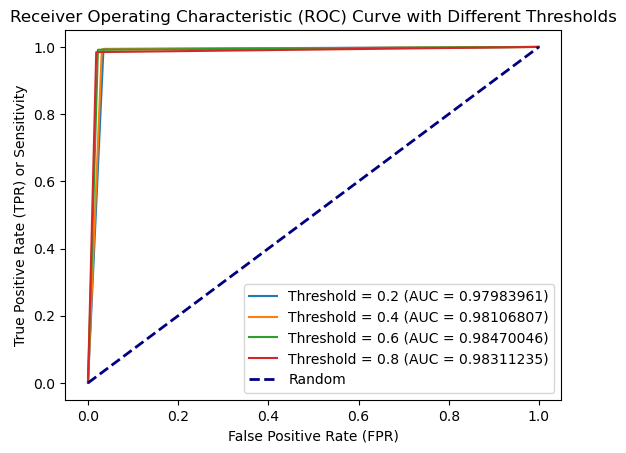

In [ ]:
y_prob = lr.predict_proba(X_test)[:, 1]
for threshold in [0.2, 0.4, 0.6, 0.8]:
    y_pred_threshold = (y_prob > threshold).astype(int)
    fpr, tpr, _ = roc_curve(y_test, y_pred_threshold)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Threshold = {:.1f} (AUC = {:.8f})'.format(threshold, roc_auc))
    #print(threshold, format(roc_auc))
# Plot the "Random" line as a dashed line from (0,0) to (1,1) for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

# Label axes and set the title for the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve with Different Thresholds')
plt.legend(loc='lower right')
plt.show()

As area under curve for threshold = 0.8 is the highest, it yields the maximum accuracy

### 2. K-Nearest Neigbours

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

In order to determine which data points are closest to a given query point, the distance between the query point and the other data points will need to be calculated. These distance metrics help to form decision boundaries, which partitions query points into different regions. Some of the commonly used distance measures are mentioned below.
1. Euclidian Distance
2. Manhattan Distance
3. Minkowski Distance
4. Hamminf Distance

#### 2.1. Building KNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

In [ ]:
# Importing Cleaned data from Phase 1
data = pd.read_csv('Group_14_Clean_Data.csv')

In [ ]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

In [ ]:
# Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Training the model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Pedicting the Test data using the model trained
y_pred = knn.predict(X_test)

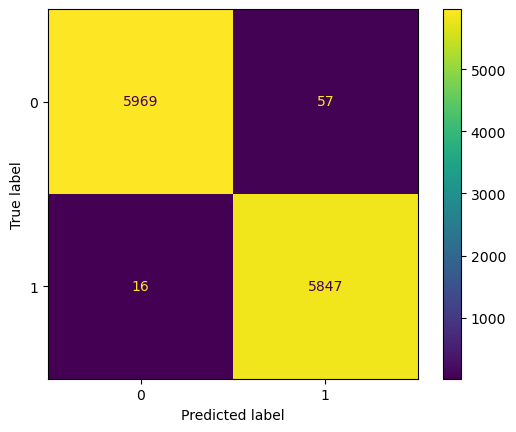

In [ ]:
# Displaying the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.9938598704685003

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6026
           1       0.99      1.00      0.99      5863

    accuracy                           0.99     11889
   macro avg       0.99      0.99      0.99     11889
weighted avg       0.99      0.99      0.99     11889



#### 2.2. Choosing optimal K value

The k value in the k-NN algorithm defines how many neighbors will be checked to determine the classification of a specific query point. For example, if k=1, the instance will be assigned to the same class as its single nearest neighbor. Defining k can be a balancing act as different values can lead to overfitting or underfitting. Lower values of k can have high variance, but low bias, and larger values of k may lead to high bias and lower variance. The choice of k will largely depend on the input data as data with more outliers or noise will likely perform better with higher values of k. Overall, it is recommended to have an odd number for k to avoid ties in classification, and cross-validation tactics can help you choose the optimal k for your dataset.

In order to find the optimal K value, we are using a loop to iterate over a range of k values and training a KNN model for each k. The goal is to identify the optimal k value based on both error and accuracy metrics.

1. Looping through k values:
The loop iterates over k values ranging from 1 to 40, with increments of 2. This range is chosen to explore a variety of neighborhood sizes while avoiding unnecessary computational overhead.

2. Error Calculation:
The error for each iteration is calculated using the formula error.append(np.mean(pred_i != y_test)). This calculates the mean of the elements where the predicted values are not equal to the actual values. This provides insight into the misclassification rate for each k value.

3. Accuracy Calculation:
The accuracy for each iteration is calculated using the formula accuracy.append(accuracy_score(y_test, pred_i)). This function computes the accuracy classification score, which is the proportion of correctly classified instances. It offers a complementary perspective to the error metric.

4. Observing Graphs:
After running the loop, two graphs are generated – one for error and another for accuracy. The x-axis represents the different k values, and the y-axis represents the corresponding error or accuracy scores. By visually inspecting these graphs, one can identify the optimal k value that balances low error and high accuracy.

In [ ]:
error = []
accuracy = []
# Calculating error and accuracy for K values between 1 and 40
for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Mean Error')

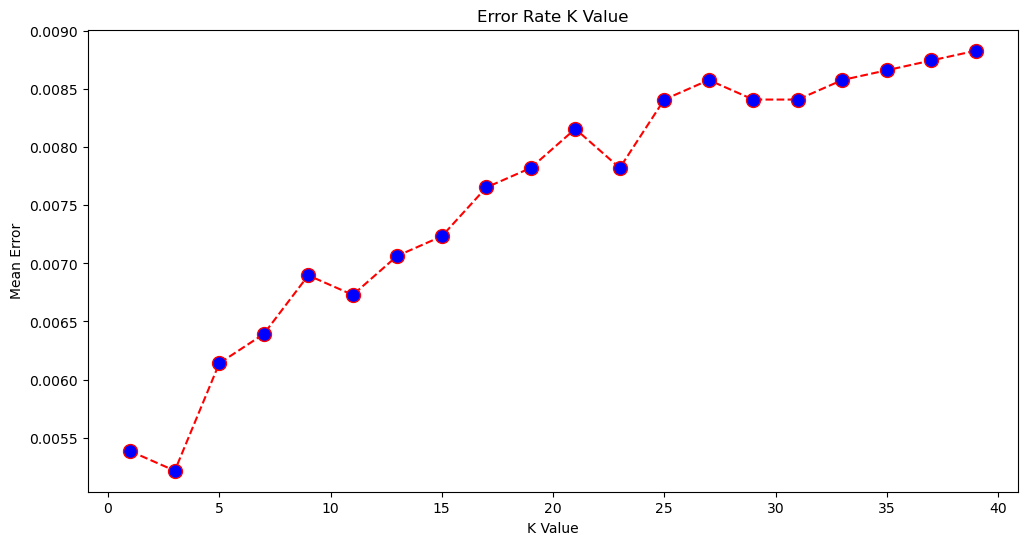

In [ ]:
# Plotting the graph of K value vs Error rate
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

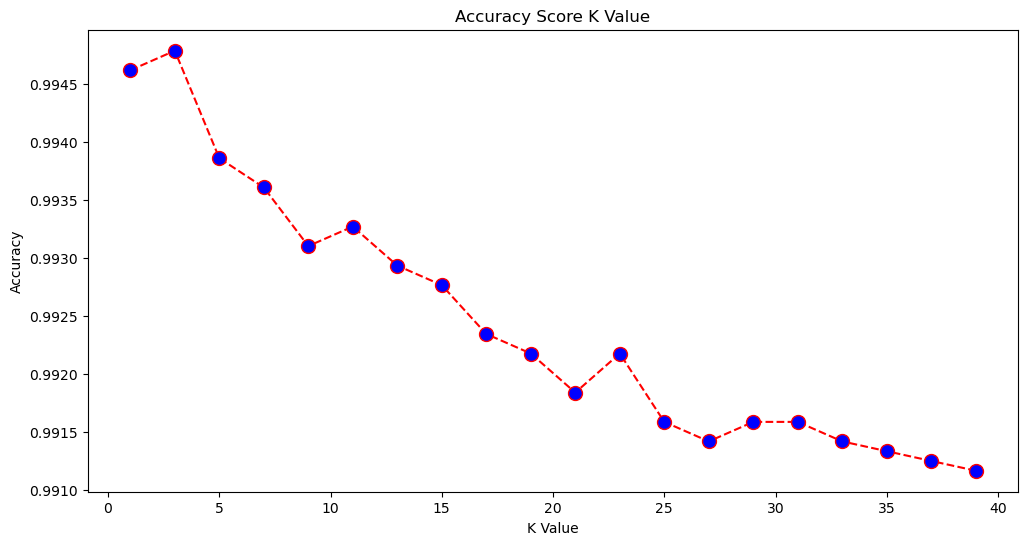

In [ ]:
# Plotting the graph of K value vs Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), accuracy, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

After observing both the graphs, k value of 3 has achieved the highest accuracy.

In [ ]:
# Using the optimal K value according to the graphs above
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred1 = knn.predict(X_test)

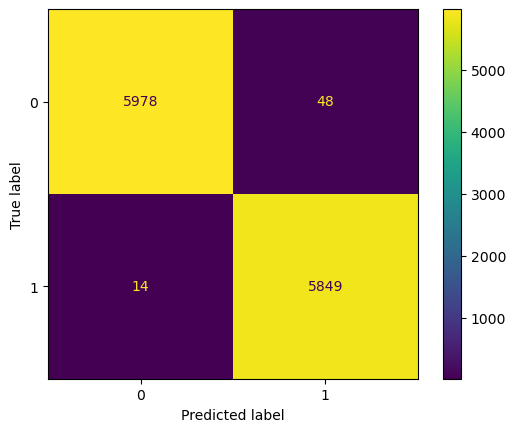

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.show()

In [ ]:
accuracy_score(y_test, y_pred1)

0.9947850954663975

As we can observe, there is a spike in the accuracy of the model after we replaced the K with the optimal K value obtained from the graphs

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6026
           1       0.99      1.00      0.99      5863

    accuracy                           0.99     11889
   macro avg       0.99      0.99      0.99     11889
weighted avg       0.99      0.99      0.99     11889



### 3. Naive Bayes


**Introduction to Naive Bayes Algorithm:**

Naive Bayes is a probabilistic machine learning algorithm based on Bayes' theorem. It is a simple yet powerful classification algorithm known for its speed and efficiency. Despite its simplicity, Naive Bayes often performs well in various real-world scenarios. The "naive" assumption in Naive Bayes is that features are conditionally independent given the class label, which simplifies the computation but may not hold in all situations.

**Advantages of Naive Bayes for Anomaly Detection:**

* Simplicity: Easy to implement and computationally efficient.
* Adaptability: Can handle high-dimensional data and large feature sets.
* Real-time Detection: Fast inference allows for real-time anomaly detection.

**Summary:**
In the context of MetroPT-3, Naive Bayes provides a straightforward approach to detecting anomalies by leveraging probability distributions learned from normal system behavior. The model can contribute to the overall system's resilience and reliability by identifying deviations that may indicate potential issues or anomalies


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Replace 'your_dataset.csv' with the actual name of your dataset
dataset = pd.read_csv('Group_14_Clean_Data.csv')
features = ['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
            'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
            'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
target = 'status'

In [ ]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], errors='coerce')
dataset['timestamp'] = (dataset['timestamp'] - dataset['timestamp'].min())  / np.timedelta64(1,'D')

In [ ]:
X = dataset[features]
y = dataset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gaussian_classifier = GaussianNB()
bernoulli_classifier = BernoulliNB()

#Since the multinomial Naive Bayes can not handle negatives value dues to the fact that
#Naive Bayes based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
#We need to add preprocessing step to move the data off the negative zone
multinomial_classifier = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])


# Train the models
gaussian_classifier.fit(X_train, y_train)
multinomial_classifier.fit(X_train, y_train)
bernoulli_classifier.fit(X_train, y_train)

# Predictions
y_pred_gaussian = gaussian_classifier.predict(X_test)
y_pred_multinomial = multinomial_classifier.predict(X_test)
y_pred_bernoulli = bernoulli_classifier.predict(X_test)

Bernoulli Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      6053
           1       0.87      1.00      0.93      5836

    accuracy                           0.93     11889
   macro avg       0.93      0.93      0.93     11889
weighted avg       0.93      0.93      0.93     11889



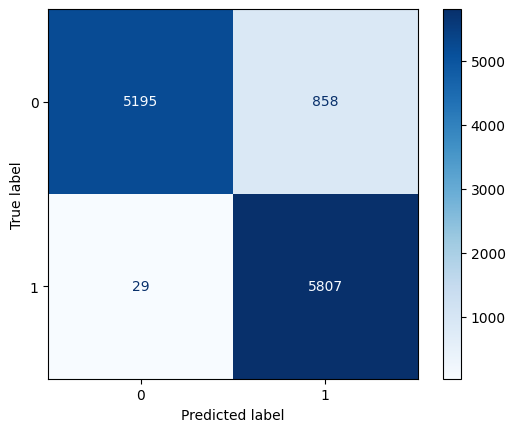

In [ ]:
# Evaluate and compare the models
print("Bernoulli Naive Bayes:")
print(classification_report(y_test, y_pred_bernoulli))
conf_matrix_bernoulli = confusion_matrix(y_test, y_pred_bernoulli)
disp_bernoulli = ConfusionMatrixDisplay(conf_matrix_bernoulli, display_labels=bernoulli_classifier.classes_)
disp_bernoulli.plot(cmap='Blues', values_format='d')
plt.show()

Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      6053
           1       0.87      1.00      0.93      5836

    accuracy                           0.92     11889
   macro avg       0.93      0.93      0.92     11889
weighted avg       0.93      0.92      0.92     11889



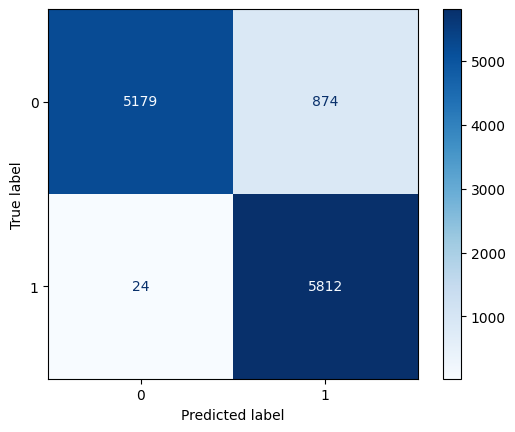

In [ ]:
print("Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_multinomial))
conf_matrix_multinomial = confusion_matrix(y_test, y_pred_multinomial)
disp_multinomial = ConfusionMatrixDisplay(conf_matrix_multinomial, display_labels=multinomial_classifier.classes_)
disp_multinomial.plot(cmap='Blues', values_format='d')
plt.show()

Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      6053
           1       0.91      1.00      0.95      5836

    accuracy                           0.95     11889
   macro avg       0.95      0.95      0.95     11889
weighted avg       0.95      0.95      0.95     11889



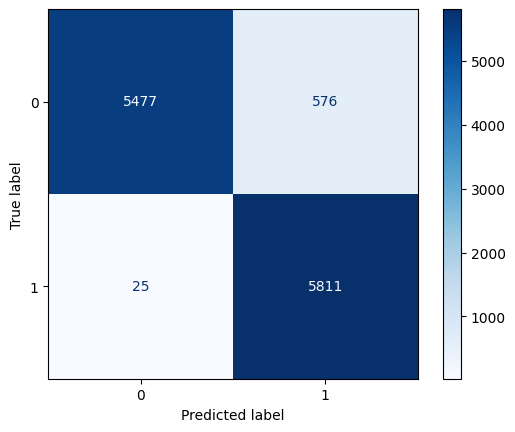

In [ ]:
print("Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gaussian))
conf_matrix_gaussian = confusion_matrix(y_test, y_pred_gaussian)
disp_gaussian = ConfusionMatrixDisplay(conf_matrix_gaussian, display_labels=gaussian_classifier.classes_)
disp_gaussian.plot(cmap='Blues', values_format='d')
plt.show()

**Analysis**:


*   Gaussian Naive Bayes achieved the highest accuracy (95%) and F1-scores for
 both classes. It seems to perform well on the given dataset, especially for Class 0.
*   Multinomial Naive Bayes has a slightly lower accuracy (92%) and F1-scores compared to Gaussian Naive Bayes.
* Bernoulli Naive Bayes has similar performance to Multinomial Naive Bayes with an accuracy of 93%.


**Conclusion**:

Gaussian Naive Bayes may be preferred here as it has the highest accuracy. However, a final conclusion can be made only after performing some other techniques too.

### 4. Random Forest

Random Forest is an ensemble learning algorithm used for classification and regression tasks. It constructs a collection of decision trees, each trained on a random subset of the data and features. By aggregating the predictions of these trees, Random Forest enhances accuracy, generalization, and resilience to overfitting.

**Building a Failure Prediction Model:** <br>
We aim to employ the Random Forest algorithm for a supervised classification problem, specifically failure prediction labeled as 0 (no failure) and 1 (failure) in the status column.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import ParameterGrid

In [ ]:
df = pd.read_csv("Group_14_Clean_Data.csv")

df = df.drop(columns=['Unnamed: 0', 'timestamp'])
label_column = 'status'
X = df.drop(label_column, axis=1)
y = df[label_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print(df.head())

Train set shape: (41611, 15) (41611,)
Test set shape: (17834, 15) (17834,)
     TP2    TP3     H1  DV_pressure  Reservoirs  Oil_temperature  \
0 -0.018  8.248  8.238       -0.024       8.248            49.45   
1 -0.018  8.248  8.238       -0.024       8.248            49.45   
2 -0.018  8.248  8.238       -0.024       8.248            49.45   
3 -0.018  8.248  8.238       -0.024       8.248            49.45   
4 -0.018  8.248  8.238       -0.024       8.248            49.45   

   Motor_current  COMP  DV_eletric  Towers  MPG  LPS  Pressure_switch  \
0           0.04   1.0         0.0     1.0  1.0  0.0              1.0   
1           0.04   1.0         0.0     1.0  1.0  0.0              1.0   
2           0.04   1.0         0.0     1.0  1.0  0.0              1.0   
3           0.04   0.0         0.0     0.0  0.0  0.0              0.0   
4           0.04   1.0         0.0     1.0  1.0  0.0              1.0   

   Oil_level  Caudal_impulses  status  
0        1.0              1.0       1

**Hyperparameters of Random Forest:** <br>
Random Forest comes with several hyperparameters that influence its performance. Here are key ones:

- Number of Trees (n_estimators): The total number of decision trees in the forest. Increasing this value generally improves performance until a certain point but can also increase computational cost.
- Maximum Depth of Trees (max_depth): The maximum depth of each decision tree. Deeper trees can capture more complex relationships but may lead to overfitting.
- Minimum Samples Split (min_samples_split): The minimum number of samples required to split an internal node. Higher values prevent small splits that might capture noise but can result in less expressive trees.
- Minimum Samples Leaf (min_samples_leaf): The minimum number of samples required to be in a leaf node. Similar to min_samples_split, it controls overfitting at the leaf level.
- Maximum Features (max_features): The maximum number of features considered for splitting a node. It introduces randomness and can enhance the diversity of trees.

Adjusting these hyperparameters allows fine-tuning the Random Forest model to achieve optimal performance for the specific failure prediction task. Cross-validation and grid search are common techniques for finding the best combination of hyperparameter values.

We will assess the model's performance and identify the optimal hyperparameters using the accuracy score from cross-validation and the out-of-bag error. We opt for randomized search due to its efficiency—training the model with grid search is time-consuming.
- **Randomized Search:**
Randomized Search is a time-efficient hyperparameter tuning technique in machine learning. It randomly samples a fixed number of hyperparameter combinations from the specified space, making it particularly useful for exploring large parameter spaces.

- **Cross Validation:**
Cross Validation is a robust evaluation method that partitions the dataset into subsets, trains the model on some, and evaluates on the rest. It provides a more reliable estimate of a model's generalization performance compared to a single train-test split.

- **Out-of-Bag Error:**
Out-of-Bag (OOB) Error is a metric used in ensemble learning, like Random Forests. It estimates a model's generalization error by evaluating its performance on data points not used in the training of a specific tree. OOB Error is particularly convenient as it doesn't require a separate validation set.

Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 20}
Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9031
           1       1.00      1.00      1.00      8803

    accuracy                           1.00     17834
   macro avg       1.00      1.00      1.00     17834
weighted avg       1.00      1.00      1.00     17834



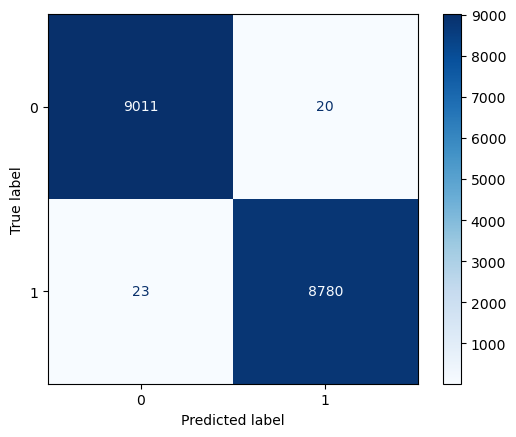

In [ ]:
# Randomized Search
model = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 10, 15]
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Extract cross-validated scores and hyperparameters
cv_scores = random_search.cv_results_['mean_test_score']
hyperparameters = random_search.cv_results_['params']

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

# Evaluate the model on the test set
y_pred_forest = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_forest)

# Print results
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))

# Display confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=best_model.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()


Hyperparameters at Each Iteration:
Iteration 1: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 5, 'max_depth': 10} - Mean Accuracy: 99.45%
Iteration 2: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 10} - Mean Accuracy: 99.45%
Iteration 3: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 15, 'max_depth': 20} - Mean Accuracy: 99.62%
Iteration 4: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 15, 'max_depth': 30} - Mean Accuracy: 99.62%
Iteration 5: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 15, 'max_depth': 30} - Mean Accuracy: 99.61%
Iteration 6: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 5, 'max_depth': 30} - Mean Accuracy: 99.62%
Iteration 7: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 10, 'max_

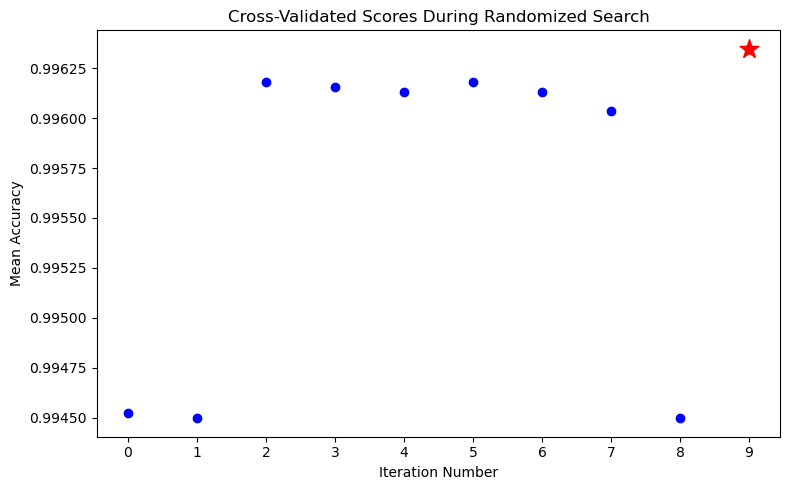

In [ ]:
# Print hyperparameters outside the plot
print("Hyperparameters at Each Iteration:")
for i, params in enumerate(hyperparameters):
    print(f"Iteration {i + 1}: {params} - Mean Accuracy: {cv_scores[i]:.2%}")

# Create a plot for cross-validated scores
plt.figure(figsize=(8, 5))

# Plot the cross-validated scores
plt.scatter(range(len(cv_scores)), cv_scores, c='blue', label='Cross-validated Scores')

# Highlight the best score
best_index = random_search.best_index_
plt.scatter(best_index, cv_scores[best_index], c='red', marker='*', s=200, label='Best Score')

# Customize the plot
plt.title('Cross-Validated Scores During Randomized Search')
plt.xlabel('Iteration Number')
plt.ylabel('Mean Accuracy')

# Set x-ticks as iteration numbers
plt.xticks(range(len(cv_scores)))


plt.tight_layout()

# Show the plot
plt.show()


Best Hyperparameters:
{'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10}
OOB Score: 99.67%
Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9031
           1       1.00      1.00      1.00      8803

    accuracy                           1.00     17834
   macro avg       1.00      1.00      1.00     17834
weighted avg       1.00      1.00      1.00     17834



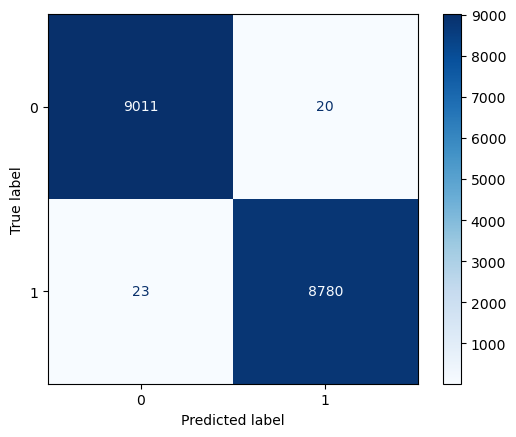

In [ ]:
# Out-Of-Bag Error
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 10, 15]
}

# Initialize a list to store results
results = []
oob_scores = []  # List to store OOB scores during grid search

# Perform randomized grid search with 10 iterations
for _ in range(10):
    params = {key: np.random.choice(values) for key, values in param_dist.items()}
    rf_model = RandomForestClassifier(oob_score=True, random_state=42, **params)
    rf_model.fit(X_train, y_train)
    oob_score = rf_model.oob_score_

    results.append({'params': params, 'oob_score': oob_score})
    oob_scores.append(oob_score)

# Find the best hyperparameters based on the highest OOB score
best_params = max(results, key=lambda x: x['oob_score'])['params']

# Print the best hyperparameters and OOB score
print('Best Hyperparameters:')
print(best_params)
print(f'OOB Score: {max(results, key=lambda x: x["oob_score"])["oob_score"]:.2%}')

# Train the final model with the best hyperparameters on the entire training set
best_model = RandomForestClassifier(oob_score=True, random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Evaluate and print the results on the test set
y_pred_forest = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_forest)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))

# Display confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=best_model.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()


Hyperparameters at Each Iteration:
Iteration 1: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10} - OOB Score: 99.67%
Iteration 2: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 5} - OOB Score: 99.46%
Iteration 3: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 15} - OOB Score: 99.64%
Iteration 4: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 10} - OOB Score: 99.64%
Iteration 5: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 15} - OOB Score: 99.59%
Iteration 6: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 10} - OOB Score: 99.60%
Iteration 7: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10} - OOB Score: 99

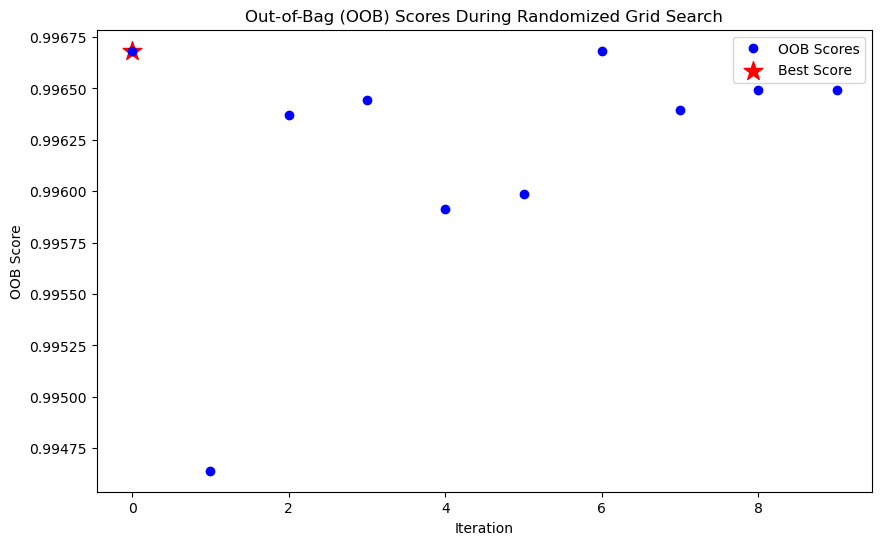

In [ ]:
# Print hyperparameters at each iteration
print("Hyperparameters at Each Iteration:")
for i, params in enumerate(results):
    print(f"Iteration {i + 1}: {params['params']} - OOB Score: {params['oob_score']:.2%}")

# Create a plot for OOB scores during grid search
plt.figure(figsize=(10, 6))

# Plot the OOB scores
plt.plot(oob_scores, marker='o', linestyle=' ', color='b', label='OOB Scores')

# Highlight the best score
best_index = np.argmax(oob_scores)
plt.scatter(best_index, oob_scores[best_index], c='red', marker='*', s=200, label='Best Score')

# Customize the plot
plt.title('Out-of-Bag (OOB) Scores During Randomized Grid Search')
plt.xlabel('Iteration')
plt.ylabel('OOB Score')
plt.legend()

# Show the plot
plt.show()


- Best Hyperparameters using cross-validation: <br>
Iteration 10: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 20} - Mean Accuracy: 99.63%

- Best Hyperparameters using out-of-bag error: <br>
{'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10}
OOB Score: 99.67%

While the optimal hyperparameters differ between out-of-bag error and cross-validation, a common trend emerges: higher 'n_estimators' and 'max_depth,' along with smaller 'min_samples_split' and 'min_samples_leaf,' and larger 'max_features,' tend to result in better accuracy. Both models, each using its optimal hyperparameters, demonstrated high accuracy on test set, reaching 100%.

### 5. Support Vector Machine

SVM, or Support Vector Machine, is ideal for complex classification tasks. It finds the best separating hyperplane in this data, perfect for categorizing states like normal or disrupted metro service. Given the dataset's diversity and dimensions, SVM can effectively distinguish different operational conditions.

Linear vs. RBF SVM:

Linear SVM is fast and effective for linearly separable data. It's simpler, but less effective for complex, non-linear relationships.
RBF SVM excels in handling non-linear data. It's more suitable for datasets like these, where relationships aren't straightforward. However, it requires careful tuning of its parameters.


In Linear SVM, focus on 'C', the regularization parameter. Adjusted it to balance between a smooth decision surface and correctly classifying training examples.
For RBF SVM, 'C' and 'gamma' are key. 'Gamma' controls the reach of a training example. Find the right balance to avoid overfitting and ensure the model generalizes well. The use of GridSearchCV is a fine method to identify these optimal settings.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Load your dataset
data = pd.read_csv('Group_14_Clean_Data.csv')
data = data.sample(frac = 1)

In [17]:
data = data.drop(columns=['Unnamed: 0', 'timestamp'])
label_column = 'status'
X = data.drop(label_column, axis=1)
y = data[label_column]

In [18]:
#Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 5.1. Linear SVM

In [20]:
#Train Linear SVM
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8936
           1       0.98      0.99      0.99      8898

    accuracy                           0.99     17834
   macro avg       0.99      0.99      0.99     17834
weighted avg       0.99      0.99      0.99     17834



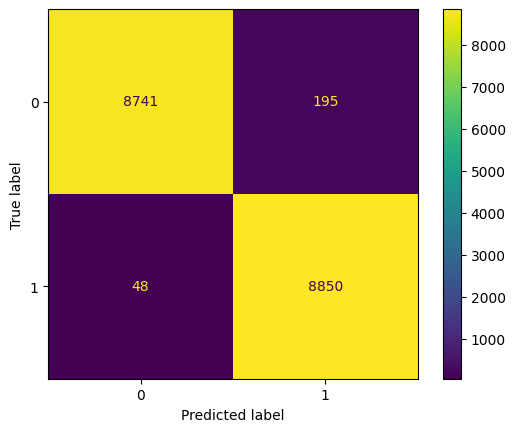

In [21]:
#Evaluate Linear SVM
y_pred = svm_model.predict(X_test)

# Print a classification report to evaluate the best model's performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display a confusion matrix for further evaluation
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### 5.2. Non-Linear SVM

In [22]:
#Train Linear SVM
svm_model = svm.SVC(kernel = 'rbf')
svm_model.fit(X_train, y_train)

SVC()


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8936
           1       0.99      0.99      0.99      8898

    accuracy                           0.99     17834
   macro avg       0.99      0.99      0.99     17834
weighted avg       0.99      0.99      0.99     17834



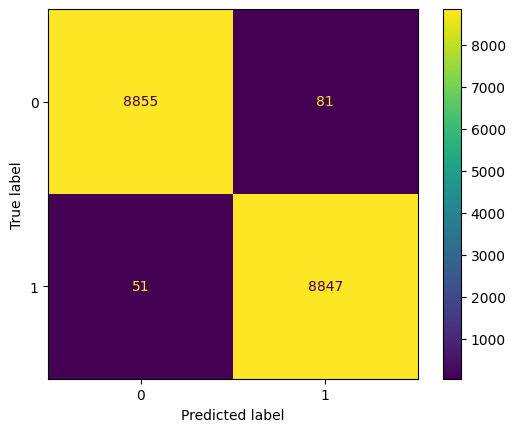

In [23]:
#Evaluate Non Linear SVM
y_pred = svm_model.predict(X_test)

# Print a classification report to evaluate the best model's performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display a confusion matrix for further evaluation
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### 5.3. Hyperparameter Tunning for LinearSVM

Since the Linear SVM achieved high accuracy on our dataset, we will perform hyperparameter tunning for the Linear SVM only. In the Linear SVM, the only hyperparameter is C, which decides the tolerance of boundary violation, the smaller C is, the more the model tolerate margin violation.  

In [24]:
c_range = [0.01, 0.1, 1, 10 , 100, 1000]
scores     = []

In [25]:
for c in c_range:
  test_svm = svm.SVC(kernel = "linear", C= c)
  test_svm.fit(X_train, y_train)
  y_pred = test_svm.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))
  del test_svm

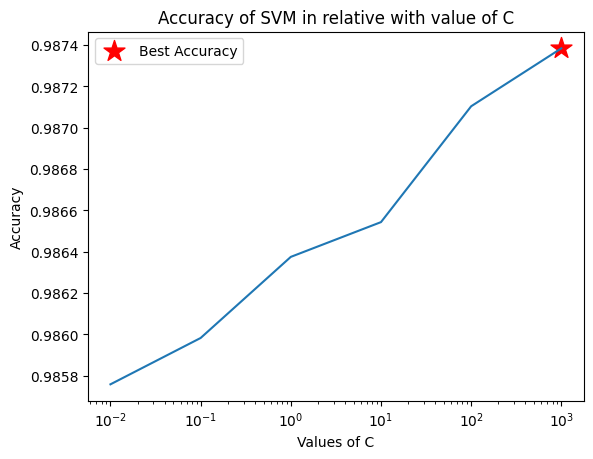

In [27]:
best_c_indx = np.argmax(scores)
best_c = c_range[best_c_indx]
best_score  = scores[best_c_indx]

plt.plot(c_range, scores)
plt.scatter(best_c, best_score, s = 250, marker = "*", color = 'r' , label = 'Best Accuracy')
plt.xlabel('Values of C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM in relative with value of C' )
plt.legend()
plt.show()

As we can see, as C increases the performance of the model also increases.

In [30]:
#Train Stest_svm = svm.SVC(kernel = "linear", C= c)
svm_model = svm.SVC(C=1000)
svm_model.fit(X_train, y_train)

SVC(C=1000)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8936
           1       0.99      1.00      0.99      8898

    accuracy                           0.99     17834
   macro avg       0.99      0.99      0.99     17834
weighted avg       0.99      0.99      0.99     17834



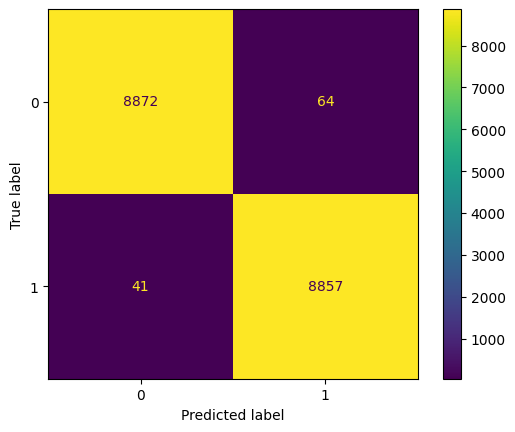

In [31]:
#Evaluate Non Linear SVM
y_pred = svm_model.predict(X_test)

# Print a classification report to evaluate the best model's performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display a confusion matrix for further evaluation
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)